In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

inputs_path = os.path.join(os.getcwd(), 'data', 'inputs')
outputs_path = os.path.join(os.getcwd(), 'data', 'outputs')

## Load and process dataset

In [2]:
instruments = [

    'SPY', 'IWM', 'EEM', 'TLT', 'USO', 'GLD', 
    'XLF', 'XLB', 'XLK', 'XLV', 'XLI', 'XLU', 'XLY',
    'XLP', 'XLE', 'AGG', 'DBC', 'HYG', 'LQD','UUP'

]

data = pd.read_csv(os.path.join(inputs_path, 'sample', 'etfs.csv'), sep = ';')
data['date'] = pd.to_datetime(data['date'])

# set date as index
data.set_index('date', inplace=True)

# select instruments
data = data[instruments]

# resample prices to business days
data = data.resample('B').ffill()

# dropna
data = data.dropna()

# compute returns
returns = data.pct_change().dropna()

# define train and test periods
train_returns, test_returns = train_test_split(returns, test_size=0.2, shuffle=False)

In [3]:
returns.head()

,SPY,IWM,EEM,TLT,USO,GLD,XLF,XLB,XLK,XLV,XLI,XLU,XLY,XLP,XLE,AGG,DBC,HYG,LQD,UUP
date,,,,,,,,,,,,,,,,,,,,
2007-04-12,0.004444,0.006725,0.016719,0.000229,0.023583,-0.001342,-0.001684,0.008843,0.010584,0.011295,0.012065,-0.004400,0.006995,0.001112,0.015305,0.001204,0.005903,0.000671,0.001505,-0.005916
2007-04-13,0.004562,0.006927,0.006055,-0.003090,-0.002517,0.012688,0.004219,0.002320,0.000838,0.014605,-0.000277,-0.000246,0.000772,0.003333,0.000476,-0.001604,0.005477,-0.001820,-0.001690,-0.000405
2007-04-16,0.009496,0.012899,0.011222,0.005510,-0.006211,0.008255,0.024371,0.013374,0.008372,0.009596,0.008042,0.005894,0.010026,0.002215,0.005868,0.002008,-0.007782,-0.000384,0.000847,-0.004050
2007-04-17,0.002658,-0.002304,-0.005870,0.005594,-0.017773,-0.005848,-0.000276,-0.009391,0.002076,0.003075,0.000000,0.004639,0.004072,0.009208,-0.005676,0.002906,-0.010196,-0.000480,0.005452,-0.000407
2007-04-18,0.001224,-0.005835,-0.007606,0.004995,-0.002983,0.005588,0.011490,-0.005380,-0.002486,-0.000279,0.002751,0.007290,-0.000760,-0.002555,-0.003489,0.001499,0.000396,0.000288,0.000280,-0.001221


In [4]:
returns.describe().T

,count,mean,std,min,25%,50%,75%,max
SPY,4335.0,0.000345,0.012572,-0.109424,-0.004116,0.000377,0.005804,0.145198
IWM,4335.0,0.000307,0.015649,-0.132669,-0.006919,0.000364,0.008086,0.091491
EEM,4335.0,0.000161,0.018195,-0.161662,-0.007801,0.000119,0.008255,0.255959
TLT,4335.0,0.000055,0.009598,-0.066683,-0.005582,0.000000,0.005522,0.075196
USO,4335.0,-0.000123,0.023317,-0.253150,-0.011199,0.000000,0.012053,0.166667
GLD,4335.0,0.000292,0.010820,-0.087808,-0.004899,0.000163,0.005578,0.112905
XLF,4335.0,0.000241,0.019768,-0.166662,-0.006785,0.000000,0.007863,0.164014
XLB,4335.0,0.000289,0.015313,-0.124121,-0.006583,0.000346,0.007982,0.140576
XLK,4335.0,0.000577,0.014308,-0.138140,-0.005242,0.000645,0.007177,0.138983
XLV,4335.0,0.000366,0.010925,-0.098610,-0.004431,0.000317,0.005923,0.120547


## Bootstrap returns

In [5]:
import random
import math
import torch
from tqdm import tqdm


def create_circular_blocks(time_series, Bsize) -> list:
    """
    Method to create the circular block sets.

    Returns:
        Block_sets (list): list of blocks
    """

    N = time_series.shape[0]
    dtime_series = torch.vstack([time_series.clone().detach(), time_series[:Bsize,:].clone().detach()])

    Block_sets = list()
    for i in range(N):
        j = i + Bsize
        Block = dtime_series[i:j,:]
        Block_sets.append(Block)
    
    return Block_sets

def sample(time_series, Bsize, Blocks):
    N = time_series.shape[0]
    b = int(math.ceil(N / Bsize))

    selected_blocks = random.choices(Blocks, k = b)

    sampled_data = torch.vstack(selected_blocks)
    return sampled_data[:N, :]

def sample_many_paths(time_series, Bsize, Blocks, k: int, use_seed=True) -> torch.Tensor:
    """
    Apply the sample function k times.

    
    Args:
        k (int): number of samples to generate.

    Returns:
        all_samples (torch.Tensor): all sampled data
    """
    
    seeds1 = []
    all_samples = []
    for i in tqdm(range(k)):

        if use_seed:
            random.seed(i * 5)
            seeds1.append(i * 5)

        sampled_data = sample(time_series, Bsize, Blocks)
        all_samples.append(sampled_data)
    
    # self.seeds['seeds1'] = seeds1
    
    return torch.stack(all_samples)

time_series = torch.tensor(train_returns.values, dtype=torch.float32)
Bsize = 10
k = 1000

# divide time series into time_series.shape[0] circular blocks
Blocks = create_circular_blocks(time_series, Bsize)

# sample k paths of size time_series.shape[0] from the blocks
sampled_paths = sample_many_paths(time_series, Bsize, Blocks, k)

100%|██████████| 1000/1000 [00:00<00:00, 3532.07it/s]


In [6]:
time_series.shape

torch.Size([3468, 20])

In [7]:
len(Blocks)

3468

In [8]:
len(Blocks[0])

10

In [9]:
sampled_paths.shape

torch.Size([1000, 3468, 20])

In [10]:
pd.DataFrame(sampled_paths[int(random.uniform(0, k)), :, :]).describe().T

,count,mean,std,min,25%,50%,75%,max
0,3468.0,0.000678,0.011817,-0.095677,-0.003834,0.000443,0.005602,0.116855
1,3468.0,0.000659,0.015077,-0.110502,-0.005913,0.000628,0.007513,0.091491
2,3468.0,0.000648,0.017748,-0.127273,-0.007889,0.000767,0.008509,0.255959
3,3468.0,0.000194,0.009138,-0.051258,-0.005261,0.000169,0.005316,0.075196
4,3468.0,-0.000327,0.023582,-0.253150,-0.011433,0.000000,0.011584,0.166667
5,3468.0,0.000344,0.010880,-0.087808,-0.005034,0.000241,0.005834,0.073519
6,3468.0,0.000469,0.019678,-0.108144,-0.006540,0.000000,0.007866,0.164014
7,3468.0,0.000703,0.015119,-0.096278,-0.005903,0.000430,0.008071,0.125943
8,3468.0,0.000924,0.013133,-0.097605,-0.004479,0.000933,0.006971,0.138983
9,3468.0,0.000724,0.010495,-0.074656,-0.004153,0.000538,0.006117,0.077057


## Run time series momentum on the bootstrapped returns

In [11]:
# from tqdm import tqdm

# # loop through the available parameters
# train_metrics = []
# for window in tqdm(range(5, 252 + (252 // 2) + 1, 1)):

#     # loop through k sample paths
#     for i in range(k):

#         # select the i-th sampled path
#         boot_returns = pd.DataFrame(sampled_paths[i, :, :])

#         # compute signal
#         signal = boot_returns.rolling(window=window).mean().shift(+1)

#         # compute positions
#         positions = signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

#         # portfolio returns
#         portfolio_returns = boot_returns.shift(-1) * positions

#         # aggregate returns
#         portfolio_returns['portfolio'] = portfolio_returns.mean(axis=1)

#         # vol scale portfolio returns
#         rolling_portfolio_vol = (portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1) + 1e-5
#         portfolio_returns['portfolio_scaled'] = portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

#         # compute maxdd
#         cumulative_returns = (1 + portfolio_returns['portfolio_scaled']).cumprod()
#         running_maximum = cumulative_returns.expanding().max()
#         drawdown = (cumulative_returns - running_maximum) / running_maximum
#         max_drawdown = drawdown.min()

#         # compute relevant metrics
#         metrics = {
#             'param': window,
#             'boot_sample': i,
#             'sharpe': portfolio_returns['portfolio'].mean() / portfolio_returns['portfolio'].std() * np.sqrt(252),
#             'maxDD': max_drawdown,
#         }

#         # append results
#         train_metrics.append(metrics)
# train_metrics_df = pd.DataFrame(train_metrics)

# # compute average Sharpe ratio for each parameter across all bootstrapped samples
# param_boot_sharpe_df = train_metrics_df[['param', 'sharpe', 'maxDD']].groupby('param').mean().sort_values(by='sharpe', ascending=False)

In [11]:
from tqdm import tqdm

# define macd parameters
parameters_list = [
    [4, 8], [4, 12], [4, 24], [4, 48], [4, 96], [4, 192], [4, 384],
    [8, 12], [8, 24], [8, 48], [8, 96], [8, 192], [8, 384],
    [16, 24], [16, 48], [16, 96], [16, 192], [16, 384],
    [32, 48], [32, 96], [32, 192], [16, 384]
]

# loop through the available parameters
train_metrics = []
for window in tqdm(parameters_list):

    # loop through k sample paths
    for i in range(k):

        # select the i-th sampled path
        boot_returns = pd.DataFrame(sampled_paths[i, :, :])

        # compute signal
        short_window, long_window = window
        ## compute the MACD signal
        signal = boot_returns.ewm(span=short_window).mean() - boot_returns.ewm(span=long_window).mean()

        # compute positions
        positions = signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

        # portfolio returns
        portfolio_returns = boot_returns.shift(-1) * positions

        # aggregate returns
        portfolio_returns['portfolio'] = portfolio_returns.mean(axis=1)

        # vol scale portfolio returns
        rolling_portfolio_vol = (portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1) + 1e-5
        portfolio_returns['portfolio_scaled'] = portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

        # compute maxdd
        cumulative_returns = (1 + portfolio_returns['portfolio_scaled']).cumprod()
        running_maximum = cumulative_returns.expanding().max()
        drawdown = (cumulative_returns - running_maximum) / running_maximum
        max_drawdown = drawdown.min()

        # compute relevant metrics
        metrics = {
            'param': str(window),
            'boot_sample': i,
            'sharpe': portfolio_returns['portfolio'].mean() / portfolio_returns['portfolio'].std() * np.sqrt(252),
            'maxDD': max_drawdown,
        }

        # append results
        train_metrics.append(metrics)
train_metrics_df = pd.DataFrame(train_metrics)

# compute average Sharpe ratio for each parameter across all bootstrapped samples
param_boot_sharpe_df = train_metrics_df[['param', 'sharpe', 'maxDD']].groupby('param').mean().sort_values(by='sharpe', ascending=False)

100%|██████████| 22/22 [09:57<00:00, 27.16s/it]


In [ ]:
# from tqdm import tqdm

# # loop through the available parameters
# train_metrics = []
# for window in tqdm(range(5, 252 + (252 // 2) + 1, 1)):

#     # loop through k sample paths
#     for i in range(k):

#         # select the i-th sampled path
#         boot_returns = pd.DataFrame(sampled_paths[i, :, :])

#         # compute signal
#         signal = boot_returns.diff(window).shift(+1)

#         # compute positions
#         positions = signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

#         # portfolio returns
#         portfolio_returns = boot_returns.shift(-1) * positions

#         # aggregate returns
#         portfolio_returns['portfolio'] = portfolio_returns.mean(axis=1)

#         # vol scale portfolio returns
#         rolling_portfolio_vol = (portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1) + 1e-5
#         portfolio_returns['portfolio_scaled'] = portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

#         # compute maxdd
#         cumulative_returns = (1 + portfolio_returns['portfolio_scaled']).cumprod()
#         running_maximum = cumulative_returns.expanding().max()
#         drawdown = (cumulative_returns - running_maximum) / running_maximum
#         max_drawdown = drawdown.min()

#         # compute relevant metrics
#         metrics = {
#             'param': window,
#             'boot_sample': i,
#             'sharpe': portfolio_returns['portfolio'].mean() / portfolio_returns['portfolio'].std() * np.sqrt(252),
#             'maxDD': max_drawdown,
#         }

#         # append results
#         train_metrics.append(metrics)
# train_metrics_df = pd.DataFrame(train_metrics)

# # compute average Sharpe ratio for each parameter across all bootstrapped samples
# param_boot_sharpe_df = train_metrics_df[['param', 'sharpe', 'maxDD']].groupby('param').mean().sort_values(by='sharpe', ascending=False)

 37%|███▋      | 138/374 [58:08<1:39:56, 25.41s/it]

In [12]:
param_boot_sharpe_df.head()

,sharpe,maxDD
param,,
"[32, 192]",-0.282616,-0.494112
"[32, 96]",-0.287624,-0.496875
"[32, 48]",-0.301807,-0.502303
"[16, 384]",-0.310976,-0.504019
"[16, 192]",-0.314647,-0.506518


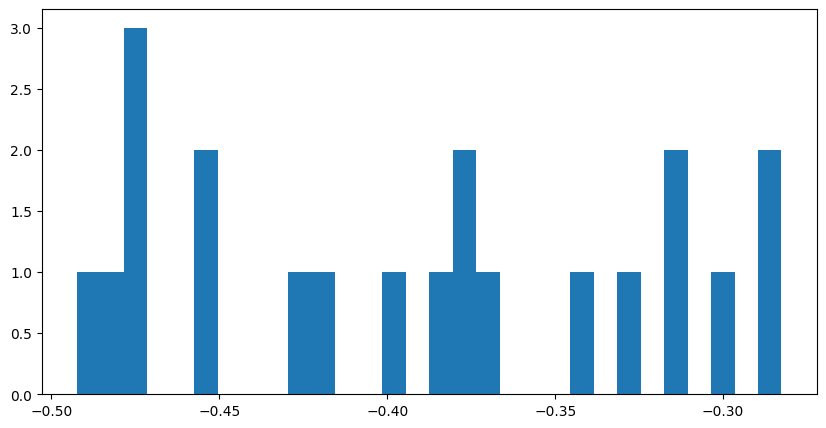

In [13]:
param_boot_sharpe_df['sharpe'].hist(bins=30, figsize=(10, 5))
plt.grid(False)

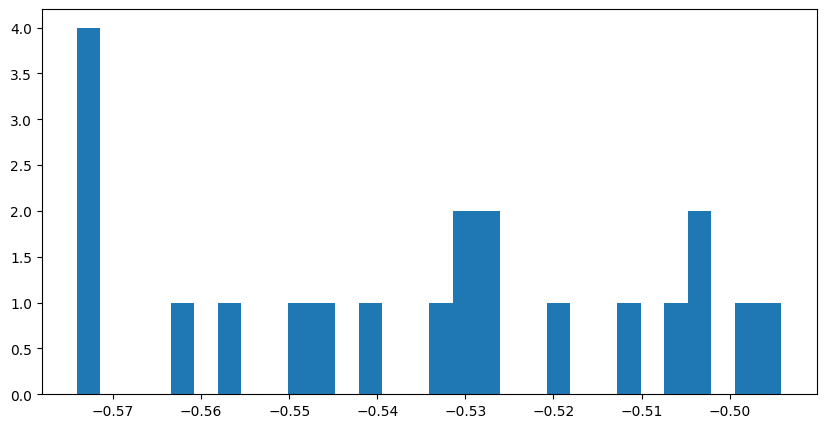

In [14]:
param_boot_sharpe_df['maxDD'].hist(bins=30, figsize=(10, 5))
plt.grid(False)

## Select different parameters

In [15]:
# maximum
train_max_param = str(param_boot_sharpe_df.index[0])
train_max_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False)['maxDD'].index[0])

# 90th percentile
train_90_param = str(param_boot_sharpe_df.index[int(len(param_boot_sharpe_df) * (1 - 0.9))])
train_90_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False).iloc[int(len(param_boot_sharpe_df) * (1 - 0.9))].name)

# 80th percentile
train_80_param = str(param_boot_sharpe_df.index[int(len(param_boot_sharpe_df) * (1 - 0.8))])
train_80_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False).iloc[int(len(param_boot_sharpe_df) * (1 - 0.8))].name)

# 70th percentile
train_70_param = str(param_boot_sharpe_df.index[int(len(param_boot_sharpe_df) * (1 - 0.7))])
train_70_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False).iloc[int(len(param_boot_sharpe_df) * (1 - 0.7))].name)

# 60th percentile
train_60_param = str(param_boot_sharpe_df.index[int(len(param_boot_sharpe_df) * (1 - 0.6))])
train_60_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False).iloc[int(len(param_boot_sharpe_df) * (1 - 0.6))].name)

# 50th percentile
train_50_param = str(param_boot_sharpe_df.index[int(len(param_boot_sharpe_df) * (1 - 0.5))])
train_50_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False).iloc[int(len(param_boot_sharpe_df) * (1 - 0.5))].name)

# 40th percentile
train_40_param = str(param_boot_sharpe_df.index[int(len(param_boot_sharpe_df) * (1 - 0.4))])
train_40_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False).iloc[int(len(param_boot_sharpe_df) * (1 - 0.4))].name)

# 30th percentile
train_30_param = str(param_boot_sharpe_df.index[int(len(param_boot_sharpe_df) * (1 - 0.3))])
train_30_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False).iloc[int(len(param_boot_sharpe_df) * (1 - 0.3))].name)

# 20th percentile
train_20_param = str(param_boot_sharpe_df.index[int(len(param_boot_sharpe_df) * (1 - 0.2))])
train_20_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False).iloc[int(len(param_boot_sharpe_df) * (1 - 0.2))].name)

# 10th percentile
train_10_param = str(param_boot_sharpe_df.index[int(len(param_boot_sharpe_df) * (1 - 0.1))])
train_10_maxdd_param = str(param_boot_sharpe_df.sort_values(by=['maxDD'], ascending=False).iloc[int(len(param_boot_sharpe_df) * (1 - 0.1))].name)

train_sharpe_params = {
    'max': train_max_param,
    '90th': train_90_param,
    '80th': train_80_param,
    '70th': train_70_param,
    '60th': train_60_param,
    '50th': train_50_param,
    '40th': train_40_param,
    '30th': train_30_param,
    '20th': train_20_param,
    '10th': train_10_param
}
train_maxdd_params = {
    'max': train_max_maxdd_param,
    '90th': train_90_maxdd_param,
    '80th': train_80_maxdd_param,
    '70th': train_70_maxdd_param,
    '60th': train_60_maxdd_param,
    '50th': train_50_maxdd_param,
    '40th': train_40_maxdd_param,
    '30th': train_30_maxdd_param,
    '20th': train_20_maxdd_param,
    '10th': train_10_maxdd_param
}

print(train_sharpe_params)
print(train_maxdd_params)

{'max': '[32, 192]', '90th': '[32, 48]', '80th': '[16, 192]', '70th': '[16, 48]', '60th': '[8, 384]', '50th': '[8, 96]', '40th': '[8, 24]', '30th': '[8, 12]', '20th': '[4, 384]', '10th': '[4, 192]'}
{'max': '[32, 192]', '90th': '[32, 48]', '80th': '[16, 192]', '70th': '[16, 48]', '60th': '[16, 24]', '50th': '[4, 8]', '40th': '[8, 48]', '30th': '[8, 24]', '20th': '[4, 24]', '10th': '[4, 96]'}


## Compute test statistics given selected parameters

In [16]:
# test_sharpe_metrics = []
# for name, window in train_sharpe_params.items():

#     window = eval(window)

#     # extend the test set with the training set using window size
#     test_returns_extended = pd.concat([train_returns.tail(window), test_returns])

#     # compute signal
#     signal = test_returns_extended.rolling(window=window).mean().shift(+1)

#     # compute positions
#     positions = signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

#     # portfolio returns
#     portfolio_returns = (test_returns_extended.shift(-1) * positions).loc[test_returns.index[0]:]

#     # aggregate returns
#     portfolio_returns['portfolio'] = portfolio_returns.mean(axis=1)

#     # vol scale portfolio returns
#     rolling_portfolio_vol = (portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1)
#     portfolio_returns['portfolio_scaled'] = portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

#     # compute maxdd
#     cumulative_returns = (1 + portfolio_returns['portfolio_scaled']).cumprod()
#     running_maximum = cumulative_returns.expanding().max()
#     drawdown = (cumulative_returns - running_maximum) / running_maximum
#     max_drawdown = drawdown.min()

#     # compute relevant metrics
#     metrics = {
#         'name': name,
#         'param': window,
#         'sharpe_train': param_boot_sharpe_df.loc[window]['sharpe'].item(),
#         'sharpe_test': portfolio_returns['portfolio'].mean() / portfolio_returns['portfolio'].std() * np.sqrt(252),
#     }
#     test_sharpe_metrics.append(metrics)
# test_sharpe_metrics_df = pd.DataFrame(test_sharpe_metrics)
# test_sharpe_metrics_df['gap'] = test_sharpe_metrics_df['sharpe_test'] - test_sharpe_metrics_df['sharpe_train']

In [ ]:
# test_maxdd_metrics = []
# for name, window in train_sharpe_params.items():

#     window = eval(window)

#     # extend the test set with the training set using window size
#     test_returns_extended = pd.concat([train_returns.tail(window), test_returns])

#     # compute signal
#     signal = test_returns_extended.rolling(window=window).mean().shift(+1)

#     # compute positions
#     positions = signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

#     # portfolio returns
#     portfolio_returns = (test_returns_extended.shift(-1) * positions).loc[test_returns.index[0]:]

#     # aggregate returns
#     portfolio_returns['portfolio'] = portfolio_returns.mean(axis=1)

#     # vol scale portfolio returns
#     rolling_portfolio_vol = (portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1)
#     portfolio_returns['portfolio_scaled'] = portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

#     # compute maxdd
#     cumulative_returns = (1 + portfolio_returns['portfolio_scaled']).cumprod()
#     running_maximum = cumulative_returns.expanding().max()
#     drawdown = (cumulative_returns - running_maximum) / running_maximum
#     max_drawdown = drawdown.min()

#     # compute relevant metrics
#     metrics = {
#         'name': name,
#         'param': window,
#         'maxDD_train': param_boot_sharpe_df.loc[window]['maxDD'],
#         'maxDD_test': max_drawdown
#     }
#     test_maxdd_metrics.append(metrics)
# test_maxdd_metrics_df = pd.DataFrame(test_maxdd_metrics)
# test_maxdd_metrics_df['gap'] = test_maxdd_metrics_df['maxDD_test'] - test_maxdd_metrics_df['maxDD_train']

In [36]:
test_sharpe_metrics = []
all_sharpe_portfolio_returns = []
for name, window in train_sharpe_params.items():
    # extend the test set with the training set using window size
    test_returns_extended = pd.concat([train_returns.tail(np.max(eval(window)).item()), test_returns])
    returns = pd.concat([train_returns, test_returns], axis=0)

    # compute signal
    short_window, long_window = eval(window)
    ## compute the MACD signal
    test_signal = test_returns_extended.ewm(span=short_window).mean() - test_returns_extended.ewm(span=long_window).mean()
    signal = returns.ewm(span=short_window).mean() - returns.ewm(span=long_window).mean()

    # compute positions
    test_positions = test_signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    positions = signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

    # portfolio returns
    portfolio_returns = (returns.shift(-1) * positions)
    test_portfolio_returns = (test_returns_extended.shift(-1) * test_positions).loc[test_returns.index[0]:]

    # aggregate returns
    test_portfolio_returns['portfolio'] = test_portfolio_returns.mean(axis=1)
    portfolio_returns['portfolio'] = portfolio_returns.mean(axis=1)

    # vol scale test portfolio returns
    rolling_portfolio_vol = (test_portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1)
    test_portfolio_returns[f'portfolio_scaled'] = test_portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

    # vol scale portfolio returns
    rolling_portfolio_vol = (portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1)
    portfolio_returns[f'portfolio_scaled_{name}_{window}'] = portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

    # compute maxdd
    test_cumulative_returns = (1 + test_portfolio_returns['portfolio_scaled']).cumprod()
    running_maximum = test_cumulative_returns.expanding().max()
    drawdown = (test_cumulative_returns - running_maximum) / running_maximum
    max_drawdown = drawdown.min()

    # compute relevant metrics
    metrics = {
        'name': name,
        'param': window,
        'sharpe_train': param_boot_sharpe_df.loc[window]['sharpe'].item(),
        'sharpe_test': portfolio_returns['portfolio'].mean() / portfolio_returns['portfolio'].std() * np.sqrt(252),
    }

    # append results
    test_sharpe_metrics.append(metrics)
    all_sharpe_portfolio_returns.append(portfolio_returns[[f'portfolio_scaled_{name}_{window}']])

# metrics
test_sharpe_metrics_df = pd.DataFrame(test_sharpe_metrics)
test_sharpe_metrics_df['gap'] = test_sharpe_metrics_df['sharpe_test'] - test_sharpe_metrics_df['sharpe_train']

# portfolio returns
all_sharpe_portfolio_returns_df = pd.concat(all_sharpe_portfolio_returns, axis=1)

In [31]:
test_maxdd_metrics = []
all_maxdd_portfolio_returns = []
for name, window in train_maxdd_params.items():
    # extend the test set with the training set using window size
    test_returns_extended = pd.concat([train_returns.tail(np.max(eval(window)).item()), test_returns])
    returns = pd.concat([train_returns, test_returns], axis=0)

    # compute signal
    short_window, long_window = eval(window)
    ## compute the MACD signal
    test_signal = test_returns_extended.ewm(span=short_window).mean() - test_returns_extended.ewm(span=long_window).mean()
    signal = returns.ewm(span=short_window).mean() - returns.ewm(span=long_window).mean()

    # compute positions
    test_positions = test_signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    positions = signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

    # portfolio returns
    portfolio_returns = (returns.shift(-1) * positions)
    test_portfolio_returns = (test_returns_extended.shift(-1) * test_positions).loc[test_returns.index[0]:]

    # aggregate returns
    test_portfolio_returns['portfolio'] = test_portfolio_returns.mean(axis=1)
    portfolio_returns['portfolio'] = portfolio_returns.mean(axis=1)

    # vol scale test portfolio returns
    rolling_portfolio_vol = (test_portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1)
    test_portfolio_returns[f'portfolio_scaled'] = test_portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

    # vol scale portfolio returns
    rolling_portfolio_vol = (portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1)
    portfolio_returns[f'portfolio_scaled_{name}_{window}'] = portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

    # compute maxdd
    test_cumulative_returns = (1 + test_portfolio_returns['portfolio_scaled']).cumprod()
    running_maximum = test_cumulative_returns.expanding().max()
    drawdown = (test_cumulative_returns - running_maximum) / running_maximum
    max_drawdown = drawdown.min()

    # compute relevant metrics
    metrics = {
        'name': name,
        'param': window,
        'maxDD_train': param_boot_sharpe_df.loc[window]['maxDD'],
        'maxDD_test': max_drawdown
    }

    # append results
    test_maxdd_metrics.append(metrics)
    all_maxdd_portfolio_returns.append(portfolio_returns[[f'portfolio_scaled_{name}_{window}']])

# metrics
test_maxdd_metrics_df = pd.DataFrame(test_maxdd_metrics)
test_maxdd_metrics_df['gap'] = test_maxdd_metrics_df['maxDD_test'] - test_maxdd_metrics_df['maxDD_train']

# portfolio returns
all_maxdd_portfolio_returns_df = pd.concat(all_maxdd_portfolio_returns, axis=1)


In [ ]:
test_sharpe_metrics = []
for name, window in train_sharpe_params.items():

    window = eval(window)

    # extend the test set with the training set using window size
    test_returns_extended = pd.concat([train_returns.tail(window), test_returns])

    # compute signal
    signal = test_returns_extended.diff(window).shift(+1)

    # compute positions
    positions = signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

    # portfolio returns
    portfolio_returns = (test_returns_extended.shift(-1) * positions).loc[test_returns.index[0]:]

    # aggregate returns
    portfolio_returns['portfolio'] = portfolio_returns.mean(axis=1)

    # vol scale portfolio returns
    rolling_portfolio_vol = (portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1)
    portfolio_returns['portfolio_scaled'] = portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

    # compute maxdd
    cumulative_returns = (1 + portfolio_returns['portfolio_scaled']).cumprod()
    running_maximum = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns - running_maximum) / running_maximum
    max_drawdown = drawdown.min()

    # compute relevant metrics
    metrics = {
        'name': name,
        'param': window,
        'sharpe_train': param_boot_sharpe_df.loc[window]['sharpe'].item(),
        'sharpe_test': portfolio_returns['portfolio'].mean() / portfolio_returns['portfolio'].std() * np.sqrt(252),
    }
    test_sharpe_metrics.append(metrics)
test_sharpe_metrics_df = pd.DataFrame(test_sharpe_metrics)
test_sharpe_metrics_df['gap'] = test_sharpe_metrics_df['sharpe_test'] - test_sharpe_metrics_df['sharpe_train']

In [ ]:
test_maxdd_metrics = []
for name, window in train_sharpe_params.items():

    window = eval(window)

    # extend the test set with the training set using window size
    test_returns_extended = pd.concat([train_returns.tail(window), test_returns])

    # compute signal
    signal = test_returns_extended.diff(window).shift(+1)

    # compute positions
    positions = signal.map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

    # portfolio returns
    portfolio_returns = (test_returns_extended.shift(-1) * positions).loc[test_returns.index[0]:]

    # aggregate returns
    portfolio_returns['portfolio'] = portfolio_returns.mean(axis=1)

    # vol scale portfolio returns
    rolling_portfolio_vol = (portfolio_returns['portfolio'].ewm(span=90, min_periods=90).std() * np.sqrt(252)).shift(+1)
    portfolio_returns['portfolio_scaled'] = portfolio_returns['portfolio'] * (0.10 / rolling_portfolio_vol)

    # compute maxdd
    cumulative_returns = (1 + portfolio_returns['portfolio_scaled']).cumprod()
    running_maximum = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns - running_maximum) / running_maximum
    max_drawdown = drawdown.min()

    # compute relevant metrics
    metrics = {
        'name': name,
        'param': window,
        'maxDD_train': param_boot_sharpe_df.loc[window]['maxDD'],
        'maxDD_test': max_drawdown
    }
    test_maxdd_metrics.append(metrics)
test_maxdd_metrics_df = pd.DataFrame(test_maxdd_metrics)
test_maxdd_metrics_df['gap'] = test_maxdd_metrics_df['maxDD_test'] - test_maxdd_metrics_df['maxDD_train']

In [21]:
test_sharpe_metrics_df

,name,param,sharpe_train,sharpe_test,gap
0,max,"[32, 192]",-0.282616,-0.060825,0.221792
1,90th,"[32, 48]",-0.301807,0.034317,0.336123
2,80th,"[16, 192]",-0.314647,-0.018567,0.296080
3,70th,"[16, 48]",-0.344125,0.307030,0.651155
4,60th,"[8, 384]",-0.374564,-0.088872,0.285692
5,50th,"[8, 96]",-0.386600,0.200681,0.587281
6,40th,"[8, 24]",-0.416643,0.171736,0.588379
7,30th,"[8, 12]",-0.451775,-0.266224,0.185551
8,20th,"[4, 384]",-0.476682,-0.217346,0.259336
9,10th,"[4, 192]",-0.477761,-0.222643,0.255118


In [22]:
print(test_sharpe_metrics_df.round(3).to_latex())

\begin{tabular}{lllrrr}
\toprule
 & name & param & sharpe_train & sharpe_test & gap \\
\midrule
0 & max & [32, 192] & -0.283000 & -0.061000 & 0.222000 \\
1 & 90th & [32, 48] & -0.302000 & 0.034000 & 0.336000 \\
2 & 80th & [16, 192] & -0.315000 & -0.019000 & 0.296000 \\
3 & 70th & [16, 48] & -0.344000 & 0.307000 & 0.651000 \\
4 & 60th & [8, 384] & -0.375000 & -0.089000 & 0.286000 \\
5 & 50th & [8, 96] & -0.387000 & 0.201000 & 0.587000 \\
6 & 40th & [8, 24] & -0.417000 & 0.172000 & 0.588000 \\
7 & 30th & [8, 12] & -0.452000 & -0.266000 & 0.186000 \\
8 & 20th & [4, 384] & -0.477000 & -0.217000 & 0.259000 \\
9 & 10th & [4, 192] & -0.478000 & -0.223000 & 0.255000 \\
\bottomrule
\end{tabular}



In [23]:
test_maxdd_metrics_df

,name,param,maxDD_train,maxDD_test,gap
0,max,"[32, 192]",-0.494112,-0.105221,0.388892
1,90th,"[32, 48]",-0.502303,-0.090674,0.411630
2,80th,"[16, 192]",-0.506518,-0.081729,0.424789
3,70th,"[16, 48]",-0.519125,-0.100421,0.418704
4,60th,"[16, 24]",-0.527960,-0.101231,0.426730
5,50th,"[4, 8]",-0.530677,-0.155338,0.375339
6,40th,"[8, 48]",-0.540379,-0.116841,0.423538
7,30th,"[8, 24]",-0.548233,-0.103019,0.445213
8,20th,"[4, 24]",-0.562616,-0.144482,0.418134
9,10th,"[4, 96]",-0.573451,-0.168586,0.404865


In [24]:
print(test_maxdd_metrics_df.round(3).to_latex())

\begin{tabular}{lllrrr}
\toprule
 & name & param & maxDD_train & maxDD_test & gap \\
\midrule
0 & max & [32, 192] & -0.494000 & -0.105000 & 0.389000 \\
1 & 90th & [32, 48] & -0.502000 & -0.091000 & 0.412000 \\
2 & 80th & [16, 192] & -0.507000 & -0.082000 & 0.425000 \\
3 & 70th & [16, 48] & -0.519000 & -0.100000 & 0.419000 \\
4 & 60th & [16, 24] & -0.528000 & -0.101000 & 0.427000 \\
5 & 50th & [4, 8] & -0.531000 & -0.155000 & 0.375000 \\
6 & 40th & [8, 48] & -0.540000 & -0.117000 & 0.424000 \\
7 & 30th & [8, 24] & -0.548000 & -0.103000 & 0.445000 \\
8 & 20th & [4, 24] & -0.563000 & -0.144000 & 0.418000 \\
9 & 10th & [4, 96] & -0.573000 & -0.169000 & 0.405000 \\
\bottomrule
\end{tabular}



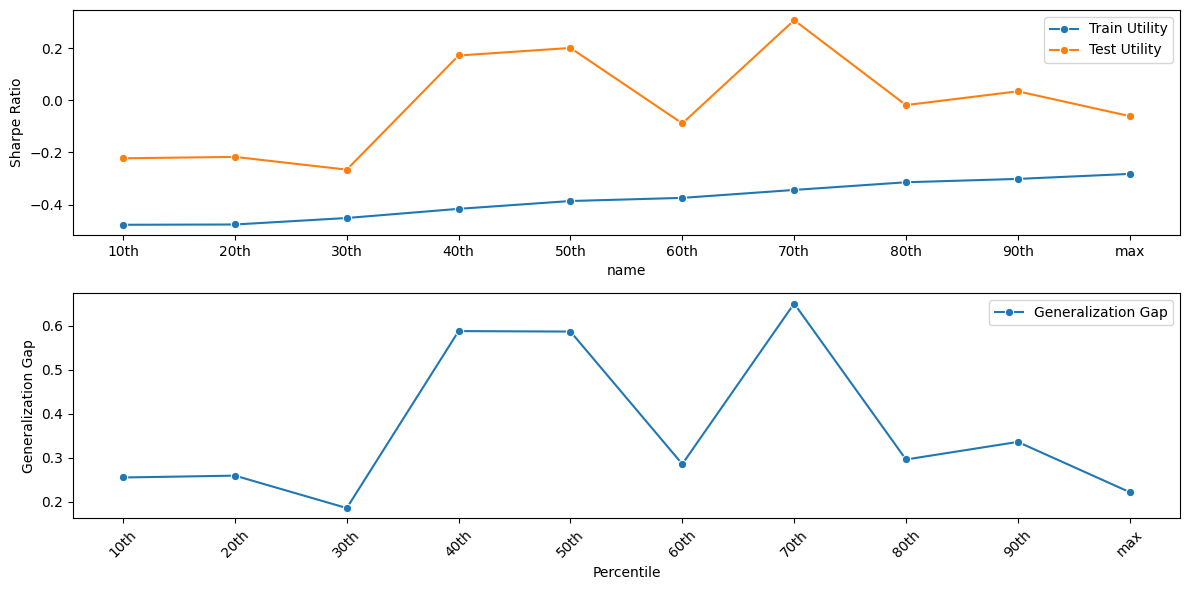

In [25]:
plot_df = test_sharpe_metrics_df.copy()
plot_df = plot_df.sort_values(by='name')

fig, ax = plt.subplots(2, 1, figsize=(12, 6))

utility = 'Sharpe Ratio'

# Plot Train Utility
sns.lineplot(data=plot_df, x='name', y='sharpe_train', ax=ax[0], marker='o', label='Train Utility')
sns.lineplot(data=plot_df, x='name', y='sharpe_test', ax=ax[0], marker='o', label='Test Utility')
ax[0].set_ylabel(f'{utility}')
ax[0].legend()

# Plot Generalization Gap
sns.lineplot(data=plot_df, x='name', y='gap', ax=ax[1], marker='o', label='Generalization Gap')
ax[1].set_xlabel('Percentile')
ax[1].set_ylabel('Generalization Gap')
ax[1].legend()

# Formatting
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(outputs_path, 'results', f'{utility.lower()}-gap-utility-lag-mom.png'))

plt.show()

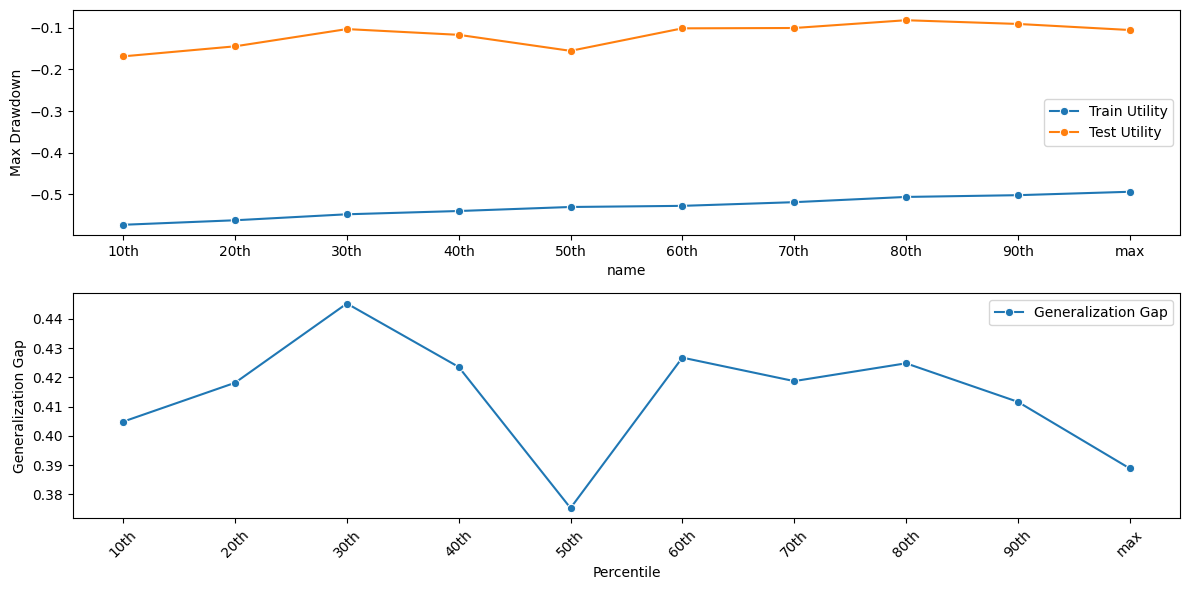

In [26]:
plot_df = test_maxdd_metrics_df.copy()
plot_df = plot_df.sort_values(by='name')

fig, ax = plt.subplots(2, 1, figsize=(12, 6))

utility = 'Max Drawdown'

# Plot Train Utility
sns.lineplot(data=plot_df, x='name', y='maxDD_train', ax=ax[0], marker='o', label='Train Utility')
sns.lineplot(data=plot_df, x='name', y='maxDD_test', ax=ax[0], marker='o', label='Test Utility')
ax[0].set_ylabel(f'{utility}')
ax[0].legend()

# Plot Generalization Gap
sns.lineplot(data=plot_df, x='name', y='gap', ax=ax[1], marker='o', label='Generalization Gap')
ax[1].set_xlabel('Percentile')
ax[1].set_ylabel('Generalization Gap')
ax[1].legend()

# Formatting
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(outputs_path, 'results', f'{utility.lower()}-gap-utility-lag-mom.png'))

plt.show()


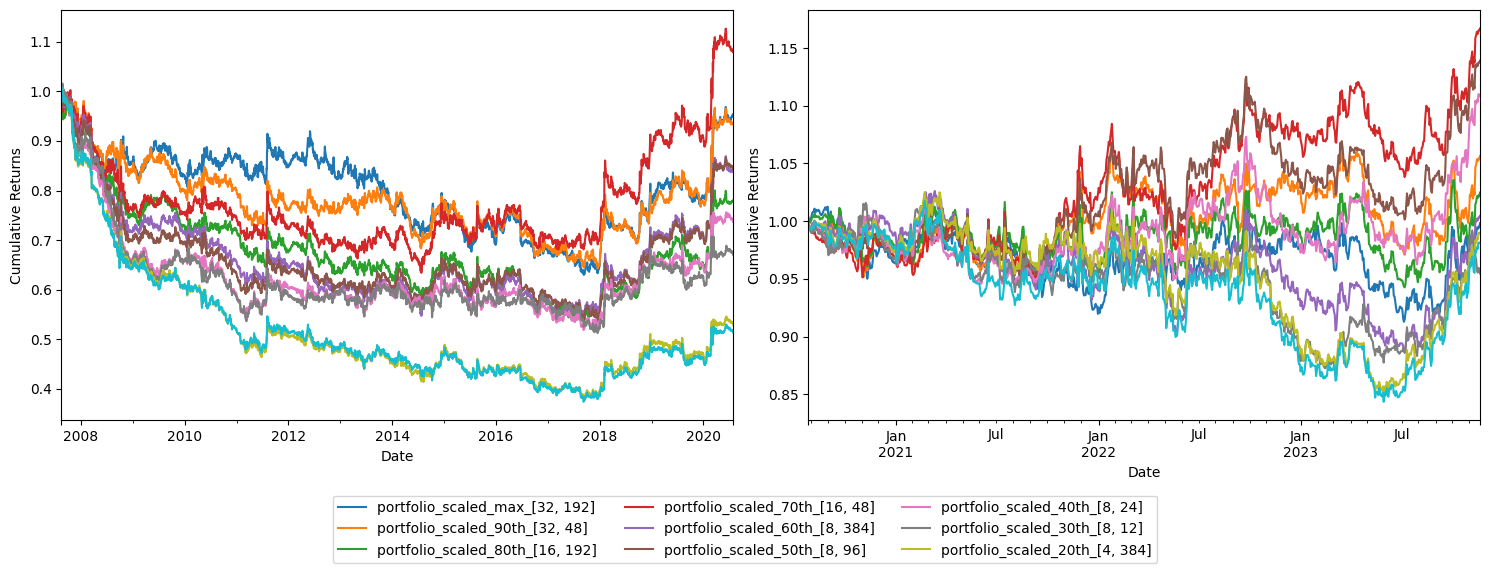

In [ ]:
# Calculate cumulative returns for train period (beginning until test date)
test_start_date = test_returns.index[0]
train_period_returns = all_sharpe_portfolio_returns_df.loc[:test_start_date].dropna()
train_cumret_df = (1 + train_period_returns).cumprod()

# Calculate cumulative returns starting from 1 at test date
test_period_returns = all_sharpe_portfolio_returns_df.loc[test_start_date:].dropna()
test_cumret_df = (1 + test_period_returns).cumprod()

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Left subplot: Train period cumulative returns (beginning until test date)
train_cumret_df.plot(ax=ax1, legend=False)
# ax1.set_title('Train Period Cumulative Returns')
ax1.set_ylabel('Cumulative Returns')
ax1.set_xlabel('Date')
ax1.grid(False)

# Right subplot: Test period cumulative returns (starting from 1 at test date)
test_cumret_df.plot(ax=ax2, legend=False)
# ax2.set_title('Test Period Cumulative Returns')
ax2.set_ylabel('Cumulative Returns')
ax2.set_xlabel('Date')
ax2.grid(False)

# Create shared legend below the plots
handles1, labels1 = ax1.get_legend_handles_labels()
# Remove the 'Test Start Date' from labels for the shared legend
portfolio_handles = handles1[:-1]  # Exclude the vertical line
portfolio_labels = labels1[:-1]   # Exclude the vertical line

# Add legend below the subplots
fig.legend(portfolio_handles,
           portfolio_labels,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3)

plt.savefig(os.path.join(outputs_path, 'results', f'{utility.lower()}-cumret-macd-mom.png'))

plt.tight_layout()
plt.show()